**Verfiy COCO Json file**

loading annotations into memory...
Done (t=2.07s)
creating index...
index created!


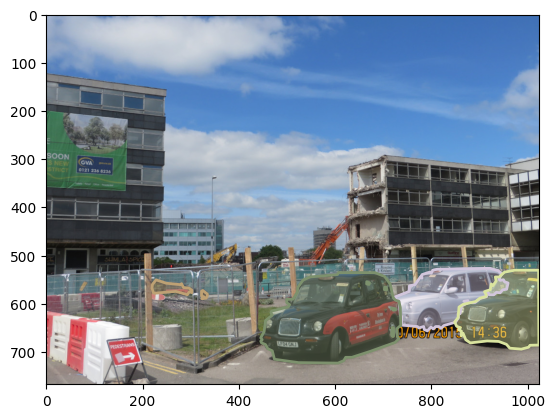

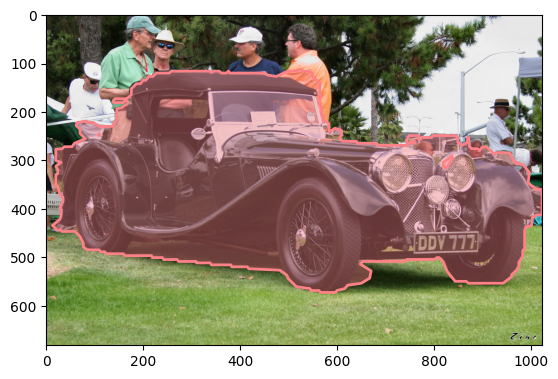

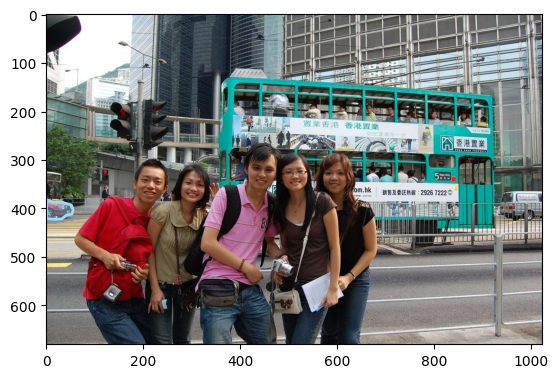

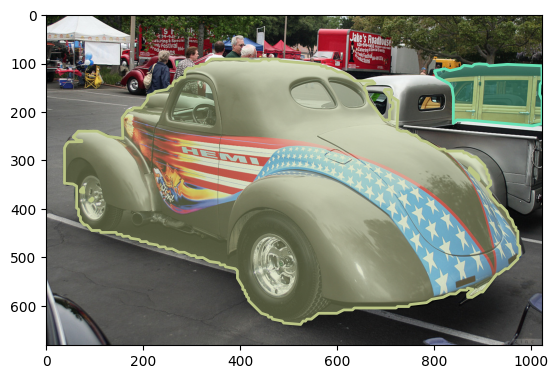

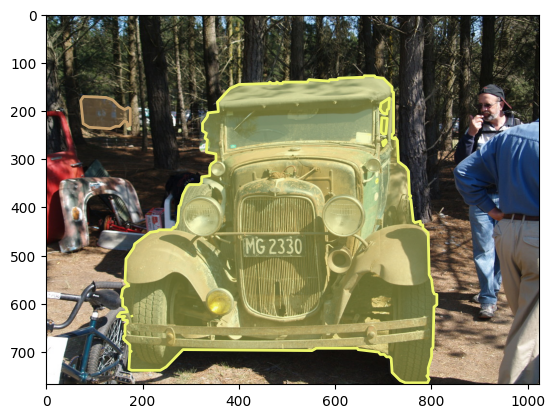

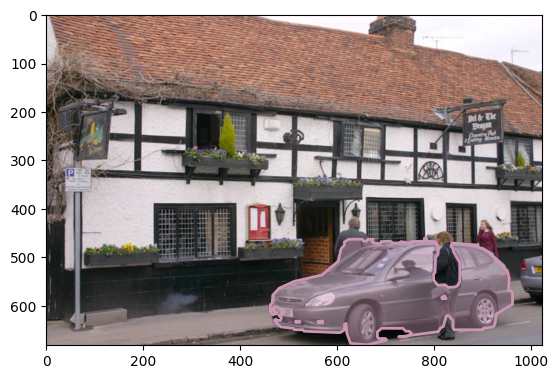

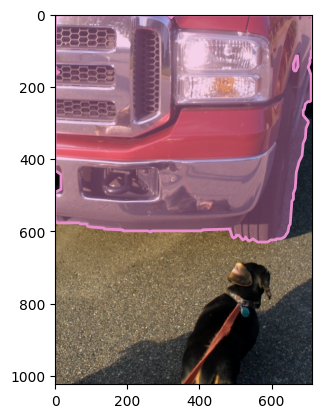

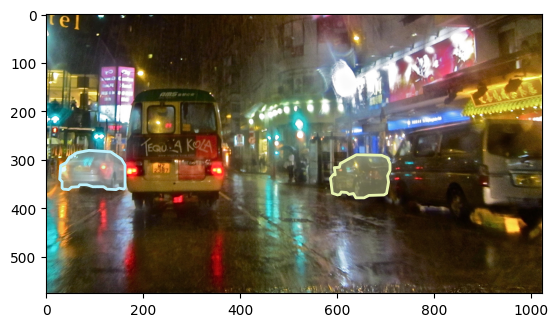

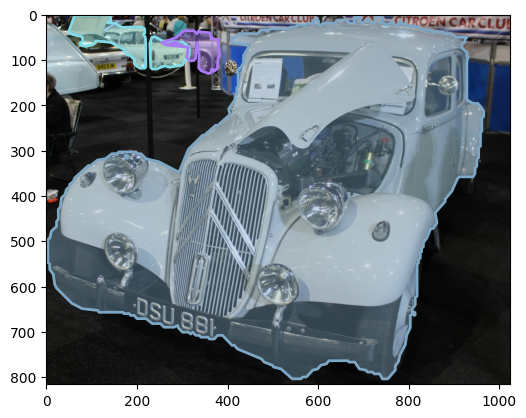

In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import os

# Load the COCO JSON file
coco = COCO('test/data.json')

# Get all image IDs
img_ids = coco.getImgIds()

# Loop through each image ID
i =  1
for img_id in img_ids:
    if  i == 10:
        break
    # Load the image
    img = coco.loadImgs(img_id)[0]
    
    # Load annotations for the selected image
    ann_ids = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(ann_ids)

    # Construct the image file path
    img_path = os.path.join(r'C:\Users\Tarek\fiftyone\open-images-v7\train\data', img['file_name'])

    # Check if the image file exists
    if not os.path.exists(img_path):
        print(f"Image file not found: {img_path}")
        continue
    
    # Visualize the image and its annotations
    img_data = plt.imread(img_path)
    plt.imshow(img_data)
    coco.showAnns(anns)
    plt.show()
    i+=1


In [2]:
import json

def validate_coco_json(coco_json_path):
    with open(coco_json_path, 'r') as f:
        data = json.load(f)
        
    # Check if essential fields are present
    required_fields = ['images', 'annotations', 'categories']
    for field in required_fields:
        if field not in data:
            print(f"Missing required field: {field}")
            return False
        
    # Check images and annotations
    for img in data['images']:
        if 'id' not in img or 'file_name' not in img:
            print(f"Image missing 'id' or 'file_name': {img}")
            return False
    
    for ann in data['annotations']:
        if 'image_id' not in ann or 'category_id' not in ann or 'bbox' not in ann:
            print(f"Annotation missing 'image_id', 'category_id', or 'bbox': {ann}")
            return False
        
    print("COCO JSON file looks valid.")
    return True

validate_coco_json('test/data.json')


COCO JSON file looks valid.


True

**Verify YOLO annotations**

C:\Users\Tarek\AppData\Local\Temp\ipykernel_3260\3225068969.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')


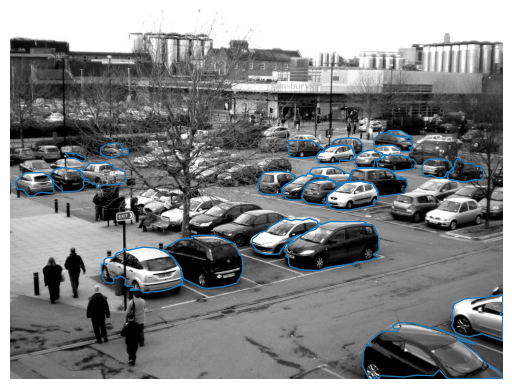

In [6]:
"""
This code defines a function to display an image with its corresponding annotations. 
It reads an image and its associated annotation file in the YOLO v8 text format, 
then plots the image along with colored polygons representing the annotated regions. 
The polygons are drawn according to the coordinates provided in the annotation file, 
and colors are assigned based on the category ID.

"""

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

def display_image_with_annotations(image_path, annotation_path, colors=None):
    # Load image using OpenCV and convert it from BGR to RGB color space
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_h, img_w, _ = image.shape
    
    # Create a figure and axis to display the image
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    ax.axis('off')  # Turn off the axes

    # Define a default color map if none is provided
    if colors is None:
        colors = plt.cm.get_cmap('tab10')

    # Open the annotation file and process each line
    with open(annotation_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            category_id = int(parts[0])
            # Choose color based on category ID, looping through color map if more than 10 categories
            color = colors(category_id % 10)
            # Extract normalized polygon coordinates and denormalize them
            polygon = [float(coord) for coord in parts[1:]]
            polygon = [coord * img_w if i % 2 == 0 else coord * img_h for i, coord in enumerate(polygon)]
            # Reshape into (num_points, 2) array
            polygon = [(polygon[i], polygon[i+1]) for i in range(0, len(polygon), 2)]
            # Create a Polygon patch using the denormalized coordinates
            patch = patches.Polygon(polygon, closed=True, edgecolor=color, fill=False)
            # Add the patch to the plot to display the annotated region
            ax.add_patch(patch)

    plt.show()  # Display the image with annotations

# Example usage with specified image and annotation paths
image_path = r"C:\Users\Tarek\fiftyone\open-images-v7\train\data\0a564b751d8b8f2a.jpg"
annotation_path = r"Labels\0a564b751d8b8f2a.txt"
display_image_with_annotations(image_path, annotation_path)